In [1]:
# Data manupulation
import pandas as pd
import numpy as np

# FIckey fuller(ADf test)
from statsmodels.tsa.stattools import adfuller,acf,pacf

#ARMA
from statsmodels.tsa.arima.model import ARIMA

# SARIMA/SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Visuals
import matplotlib.pyplot as plt
import seaborn as sb

# Metrics for regression
from sklearn.metrics import mean_squared_error

# lunch box test
import statsmodels.api as sm

# For seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Exponential smoothing
from statsmodels.tsa.api import ExponentialSmoothing

# plotting using plot_
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# datetime
import datetime as dt

# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# ABSTRACT:

# DATA EXPLORATION

In [2]:
furniture_orders = pd.read_excel('DS3_C6_S4_TimeSeries_Sales_Data_Project.xls',sheet_name='Orders', parse_dates=['Order Date'])
furniture_returns = pd.read_excel('DS3_C6_S4_TimeSeries_Sales_Data_Project.xls',sheet_name='Returns')
furniture_people = pd.read_excel('DS3_C6_S4_TimeSeries_Sales_Data_Project.xls',sheet_name='People')
furniture_orders.set_index('Order Date', inplace=True)
furniture_orders1 = furniture_orders
furniture_orders = furniture_orders[(furniture_orders.Category=='Furniture')]
furniture_orders

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2014-06-09,6,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
2014-06-09,11,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-19,9963,CA-2015-168088,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2016-12-05,9965,CA-2016-146374,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2015-09-06,9981,US-2015-151435,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548


In [3]:
furniture_orders.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2121 entries, 2016-11-08 to 2017-02-26
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Ship Date      2121 non-null   datetime64[ns]
 3   Ship Mode      2121 non-null   object        
 4   Customer ID    2121 non-null   object        
 5   Customer Name  2121 non-null   object        
 6   Segment        2121 non-null   object        
 7   Country        2121 non-null   object        
 8   City           2121 non-null   object        
 9   State          2121 non-null   object        
 10  Postal Code    2121 non-null   int64         
 11  Region         2121 non-null   object        
 12  Product ID     2121 non-null   object        
 13  Category       2121 non-null   object        
 14  Sub-Category   2121 non-null   object        
 15  Pro

In [4]:
corr = furniture_orders.corr()

In [5]:
corr.style.background_gradient(cmap='coolwarm')

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.017164,0.001696,-0.000246,0.031848,0.008775
Postal Code,0.017164,1.000000,-0.011786,0.013700,0.106736,-0.026335
Sales,0.001696,-0.011786,1.000000,0.437464,-0.028576,0.173510
Quantity,-0.000246,0.013700,0.437464,1.000000,-0.015695,0.061213
Discount,0.031848,0.106736,-0.028576,-0.015695,1.000000,-0.483769
Profit,0.008775,-0.026335,0.173510,0.061213,-0.483769,1.000000


In [6]:
resampled_furniture_orders = furniture_orders.resample('W').sum()
resampled_furniture_orders

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Order Date,,,,,,
2014-01-12,16720,161814,2712.4280,15,0.60,717.0750
2014-01-19,20830,247101,1250.4730,24,1.55,-254.0044
2014-01-26,43954,466710,1655.9580,26,0.20,355.6263
2014-02-02,7162,184728,623.6660,5,0.35,-13.2304
2014-02-09,9267,89031,14.5600,2,0.00,5.5328
...,...,...,...,...,...,...
2017-12-03,179311,1775514,16008.1720,152,6.10,-178.6637
2017-12-10,131000,1205164,8794.4040,115,3.40,519.7188
2017-12-17,100186,1066007,4639.8190,57,4.85,-780.1243


In [7]:
resampled_furniture_orders.isnull().sum()

Row ID         0
Postal Code    0
Sales          0
Quantity       0
Discount       0
Profit         0
dtype: int64

In [8]:
sales_data = resampled_furniture_orders['Sales']
sales_data

Order Date
2014-01-12     2712.4280
2014-01-19     1250.4730
2014-01-26     1655.9580
2014-02-02      623.6660
2014-02-09       14.5600
                 ...    
2017-12-03    16008.1720
2017-12-10     8794.4040
2017-12-17     4639.8190
2017-12-24     7274.0430
2017-12-31     4037.5648
Freq: W-SUN, Name: Sales, Length: 208, dtype: float64

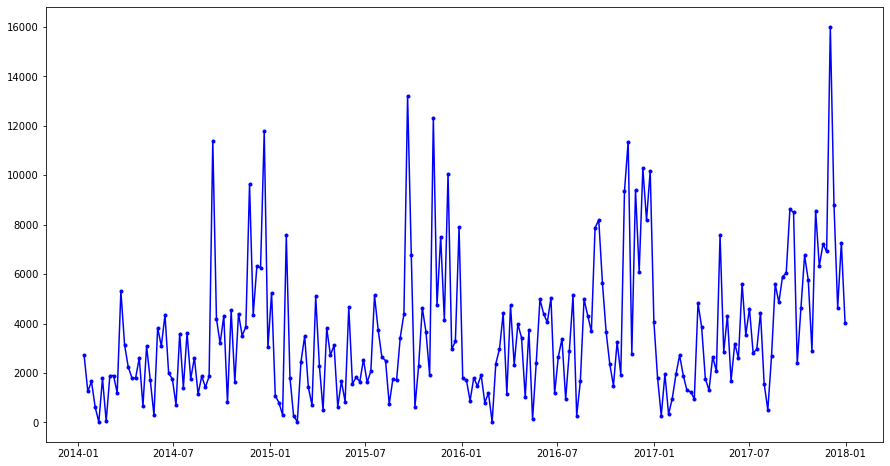

In [9]:
fig,ax = plt.subplots(figsize = (15,8))
plt.plot(sales_data,color = 'b',marker ='.')
plt.show()

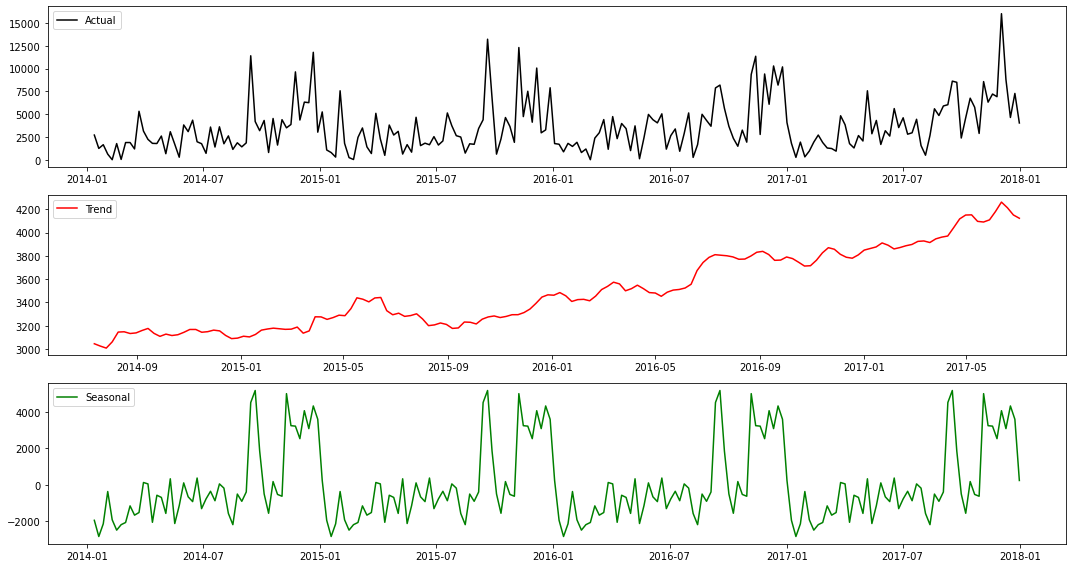

In [10]:
# Decomposing the data
decomp = seasonal_decompose(sales_data,period=52)

d_sea = decomp.seasonal
d_tren = decomp.trend


fig,ax = plt.subplots(2,2,figsize = (15,8))


plt.subplot(311)
plt.plot(sales_data,label = 'Actual',color = 'black')
plt.legend()

plt.subplot(312)
plt.plot(d_tren,label = 'Trend',color = 'r')
plt.legend()

plt.subplot(313)
plt.plot(d_sea,label = 'Seasonal',color = 'g')
plt.legend()



plt.tight_layout()
plt.show()

**THERE IS A TREND AND SEASONING AVAILABLE IN THE GIVEN DATA.**

In [11]:
furniture_returns

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999
...,...,...
291,Yes,CA-2015-101910
292,Yes,CA-2017-156958
293,Yes,CA-2016-105585
294,Yes,CA-2016-148796


In [12]:
furniture_people

,Person,Region
0,Anna Andreadi,West
1,Chuck Magee,East
2,Kelly Williams,Central
3,Cassandra Brandow,South


In [13]:
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)
    return msg

In [14]:
checkStationarity(sales_data)

'pvalue=0.009539026607022234. Data is Stationary. Proceed to model building'

**SINCE THE DATA IS STATIONARY DIFFERENCING OF THE DATA IS NOT REQUIRED.**

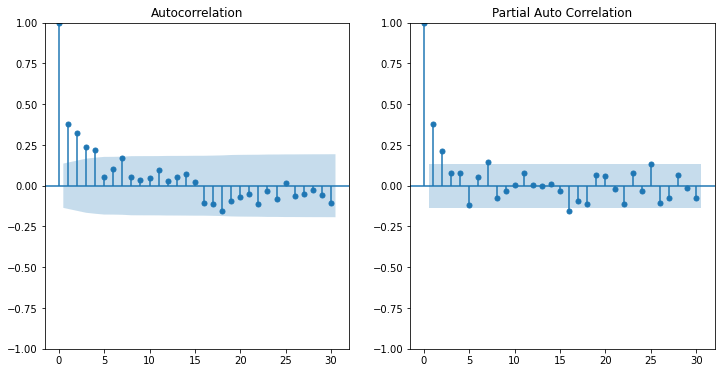

In [15]:
# ACF and PACF plots
fig,ax = plt.subplots(1,2,figsize=(12,6))

plot_acf(sales_data, lags=30, ax=ax[0]);
plt.title("Auto Correlation")

plot_pacf(sales_data, lags=30, ax=ax[1]);
plt.title("Partial Auto Correlation")

plt.show()

In [16]:
# Splitting the data

ratio = int(0.8*len(resampled_furniture_orders))
train = resampled_furniture_orders.Sales.iloc[:ratio]
test = resampled_furniture_orders.Sales.iloc[ratio:]

print(f'Train = {train.shape} | Test = {test.shape}')

Train = (166,) | Test = (42,)


In [17]:
train

Order Date
2014-01-12    2712.4280
2014-01-19    1250.4730
2014-01-26    1655.9580
2014-02-02     623.6660
2014-02-09      14.5600
                ...    
2017-02-12    1940.5450
2017-02-19    2716.0204
2017-02-26    1890.7320
2017-03-05    1296.4640
2017-03-12    1237.4300
Freq: W-SUN, Name: Sales, Length: 166, dtype: float64

In [18]:
test

Order Date
2017-03-19      951.6460
2017-03-26     4827.3080
2017-04-02     3846.4728
2017-04-09     1775.1585
2017-04-16     1300.0530
2017-04-23     2660.3620
2017-04-30     2064.5086
2017-05-07     7563.8318
2017-05-14     2854.3050
2017-05-21     4315.4260
2017-05-28     1684.1030
2017-06-04     3189.5964
2017-06-11     2604.8940
2017-06-18     5614.8635
2017-06-25     3534.2230
2017-07-02     4604.9022
2017-07-09     2807.8420
2017-07-16     2963.5510
2017-07-23     4442.2370
2017-07-30     1562.4320
2017-08-06      505.4320
2017-08-13     2670.6860
2017-08-20     5592.7900
2017-08-27     4854.5880
2017-09-03     5900.2410
2017-09-10     6038.8250
2017-09-17     8620.5420
2017-09-24     8494.1200
2017-10-01     2389.5760
2017-10-08     4619.6080
2017-10-15     6753.4950
2017-10-22     5757.5992
2017-10-29     2891.8480
2017-11-05     8570.8400
2017-11-12     6318.5660
2017-11-19     7207.6350
2017-11-26     6914.8960
2017-12-03    16008.1720
2017-12-10     8794.4040
2017-12-17    

# EXPLORATORY DATA ANALYSIS

In [19]:
def bar_percentage(ax,count='number of rows in data'):
    for bar in ax.patches:                                           
        percentage = f"{round((bar.get_height() /count)*100, 2)}%"
        x = bar.get_x() + bar.get_width() /2
        y = bar.get_height()
        ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )

In [20]:
furniture_orders.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2121 entries, 2016-11-08 to 2017-02-26
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Ship Date      2121 non-null   datetime64[ns]
 3   Ship Mode      2121 non-null   object        
 4   Customer ID    2121 non-null   object        
 5   Customer Name  2121 non-null   object        
 6   Segment        2121 non-null   object        
 7   Country        2121 non-null   object        
 8   City           2121 non-null   object        
 9   State          2121 non-null   object        
 10  Postal Code    2121 non-null   int64         
 11  Region         2121 non-null   object        
 12  Product ID     2121 non-null   object        
 13  Category       2121 non-null   object        
 14  Sub-Category   2121 non-null   object        
 15  Pro

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Bookcases'),
  Text(1, 0, 'Chairs'),
  Text(2, 0, 'Labels'),
  Text(3, 0, 'Tables'),
  Text(4, 0, 'Storage'),
  Text(5, 0, 'Furnishings'),
  Text(6, 0, 'Art'),
  Text(7, 0, 'Phones'),
  Text(8, 0, 'Binders'),
  Text(9, 0, 'Appliances'),
  Text(10, 0, 'Paper'),
  Text(11, 0, 'Accessories'),
  Text(12, 0, 'Envelopes'),
  Text(13, 0, 'Fasteners'),
  Text(14, 0, 'Supplies'),
  Text(15, 0, 'Machines'),
  Text(16, 0, 'Copiers')])

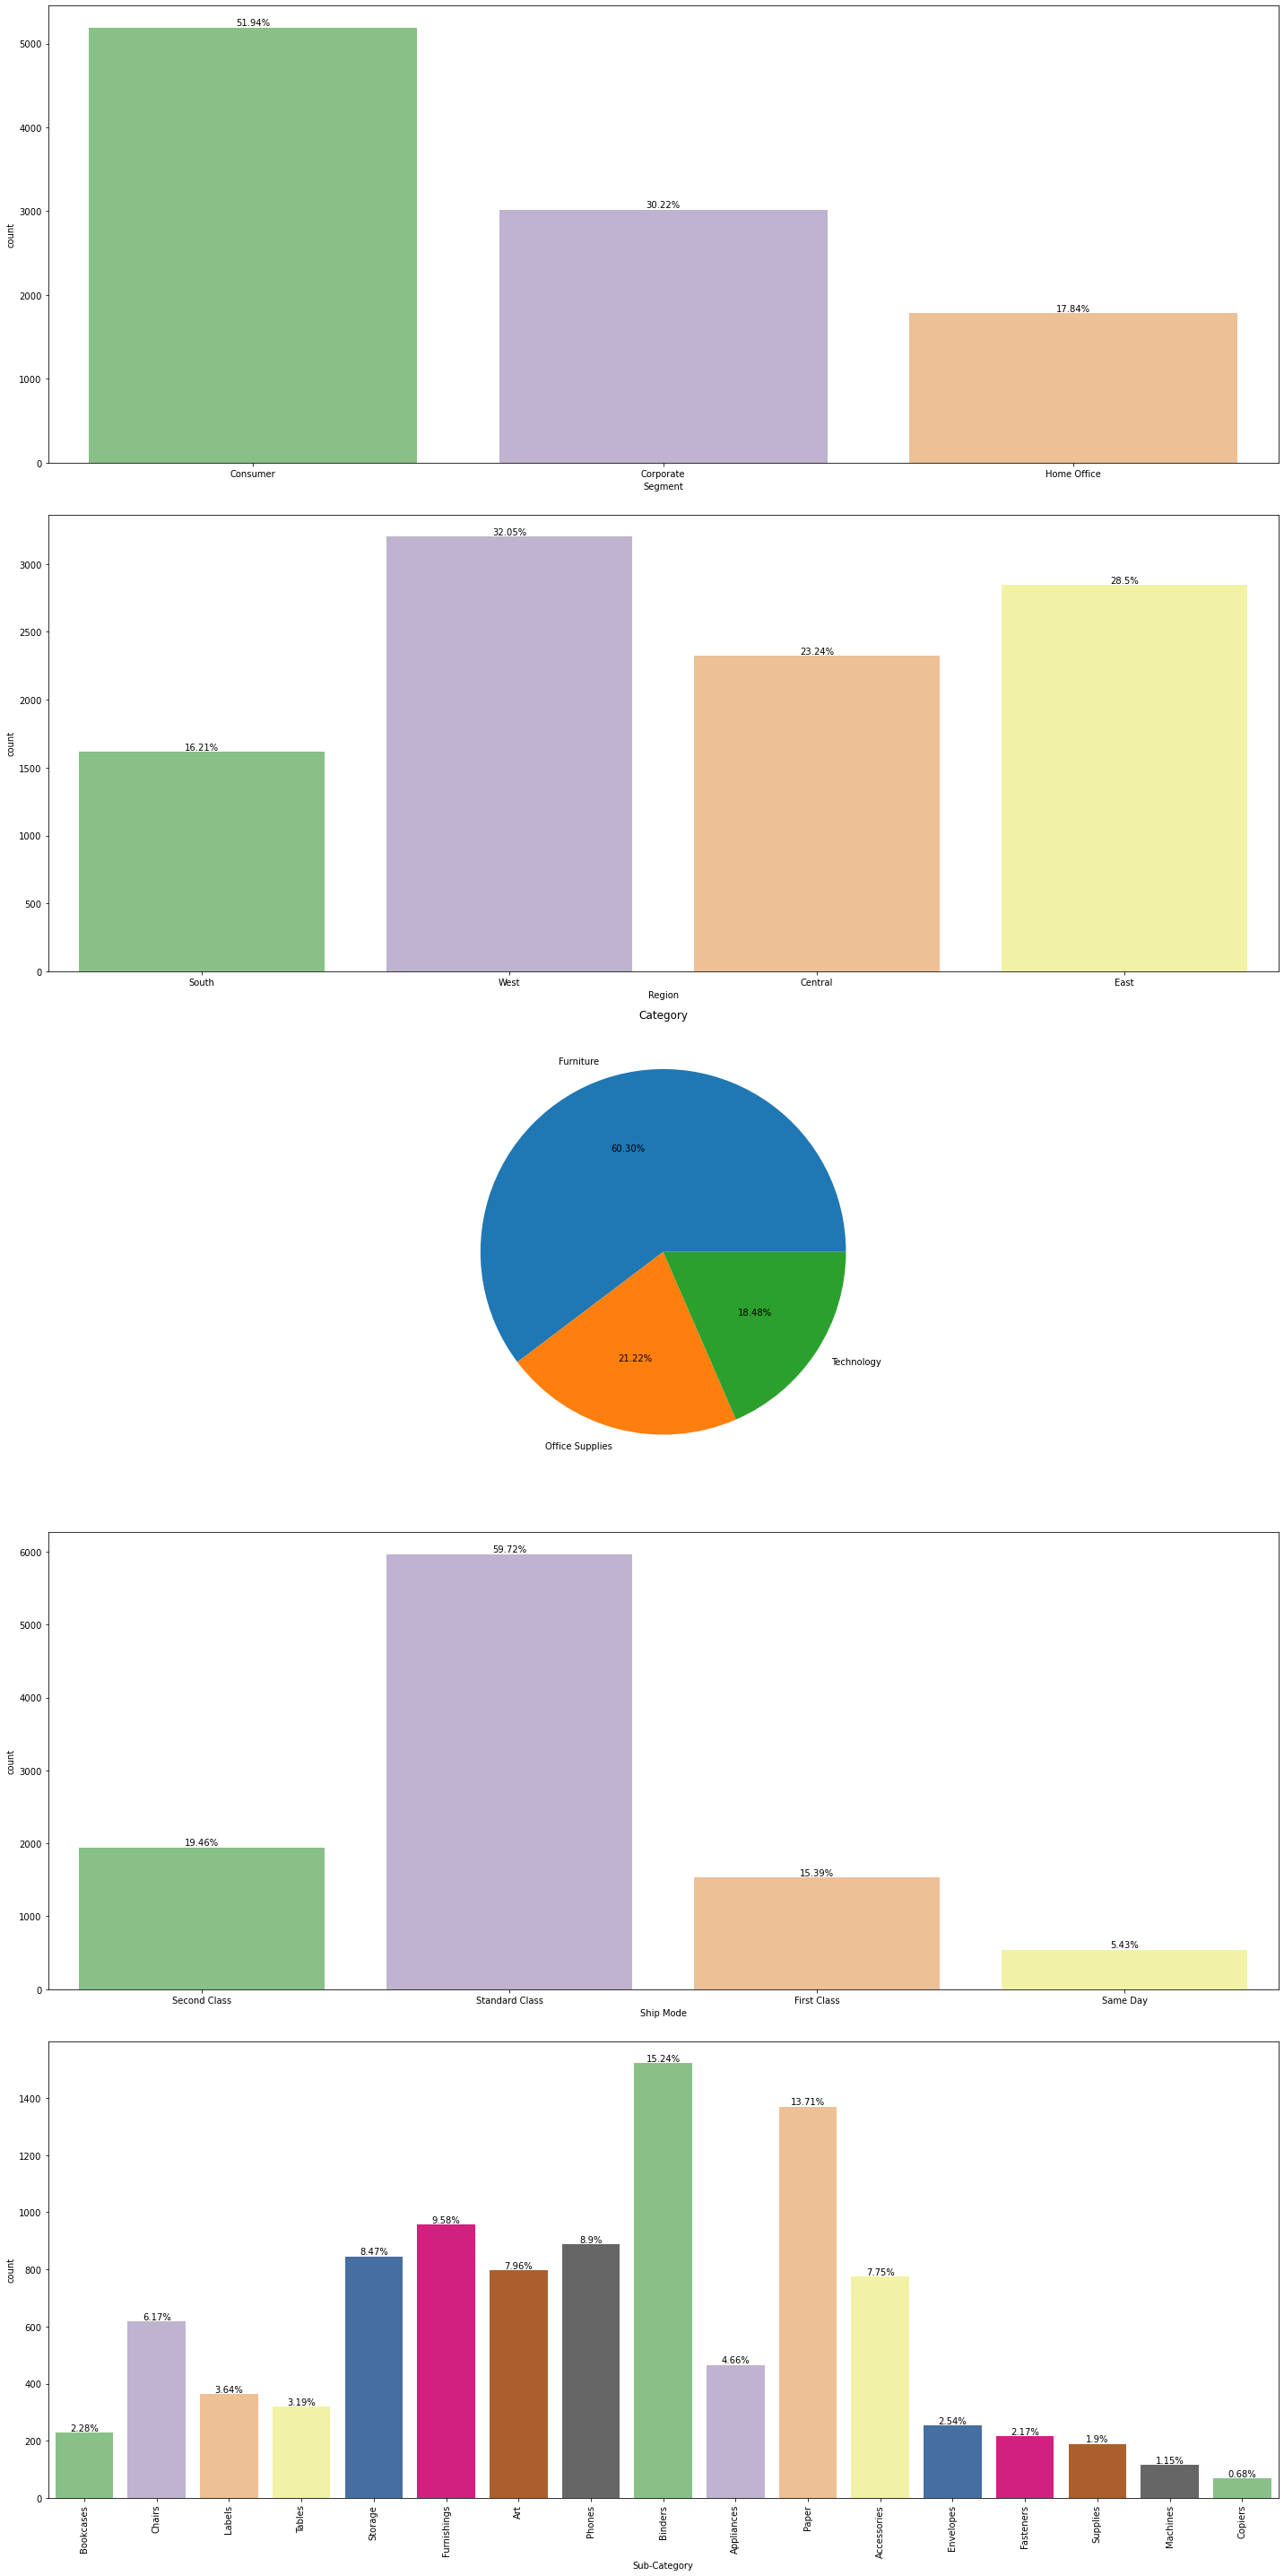

In [21]:
# Plotting the countplot for univariate analysis

fig, ax = plt.subplots(5,1, tight_layout=True ,figsize=(20,40))
bar_percentage(sb.countplot(furniture_orders1['Segment'], palette='Accent', ax=ax[0]), len(furniture_orders1))
bar_percentage(sb.countplot(furniture_orders1['Region'], palette="Accent", ax=ax[1]), len(furniture_orders1))
data = furniture_orders1['Category'].value_counts()
ax[2].pie(data,autopct='%.2f%%',labels=furniture_orders1['Category'].unique())
ax[2].set_title('Category')
bar_percentage(sb.countplot(furniture_orders1['Ship Mode'], palette="Accent", ax=ax[3]), len(furniture_orders1))
bar_percentage(sb.countplot(furniture_orders1['Sub-Category'], palette="Accent", ax=ax[4]), len(furniture_orders1))
plt.xticks(rotation=90)

**BINDERS AND PAPERS WERE FOUND TO BE BOUGHT MORE MY THE CUSTOMERS AND MOST OF THE CUSTOMER SEGMENT LIES IN CONSUMER SECTOR AND WEST REGION CUSTOMERS ARE HIGH IN NUMBERS AND MOST PREFERABLY STANDARD CLASS SHIP MODE IS CHOSEN BY THE CUSTOMERS.**

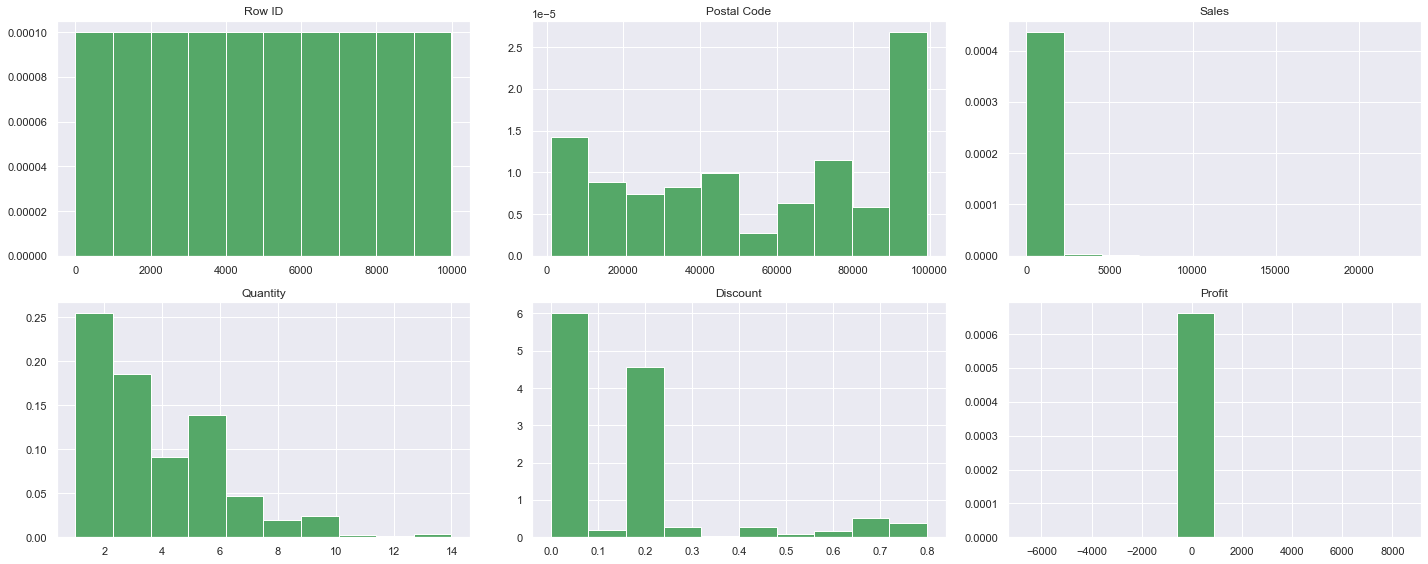

In [22]:
# For numerical Colums
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = furniture_orders1.select_dtypes(include=numerics)
numeric_cols=new_df.columns
num_cols=3
n_bins = 10
sb.set(style="darkgrid")

# Num of Rows
num_rows= int(len(numeric_cols)/num_cols)
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,8))

# For visualizing the data usig histogram
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(new_df[col],bins=n_bins,density=True,color = "g")
    ax.set_title(col)

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Bookcases'),
  Text(1, 0, 'Chairs'),
  Text(2, 0, 'Labels'),
  Text(3, 0, 'Tables'),
  Text(4, 0, 'Storage'),
  Text(5, 0, 'Furnishings'),
  Text(6, 0, 'Art'),
  Text(7, 0, 'Phones'),
  Text(8, 0, 'Binders'),
  Text(9, 0, 'Appliances'),
  Text(10, 0, 'Paper'),
  Text(11, 0, 'Accessories'),
  Text(12, 0, 'Envelopes'),
  Text(13, 0, 'Fasteners'),
  Text(14, 0, 'Supplies'),
  Text(15, 0, 'Machines'),
  Text(16, 0, 'Copiers')])

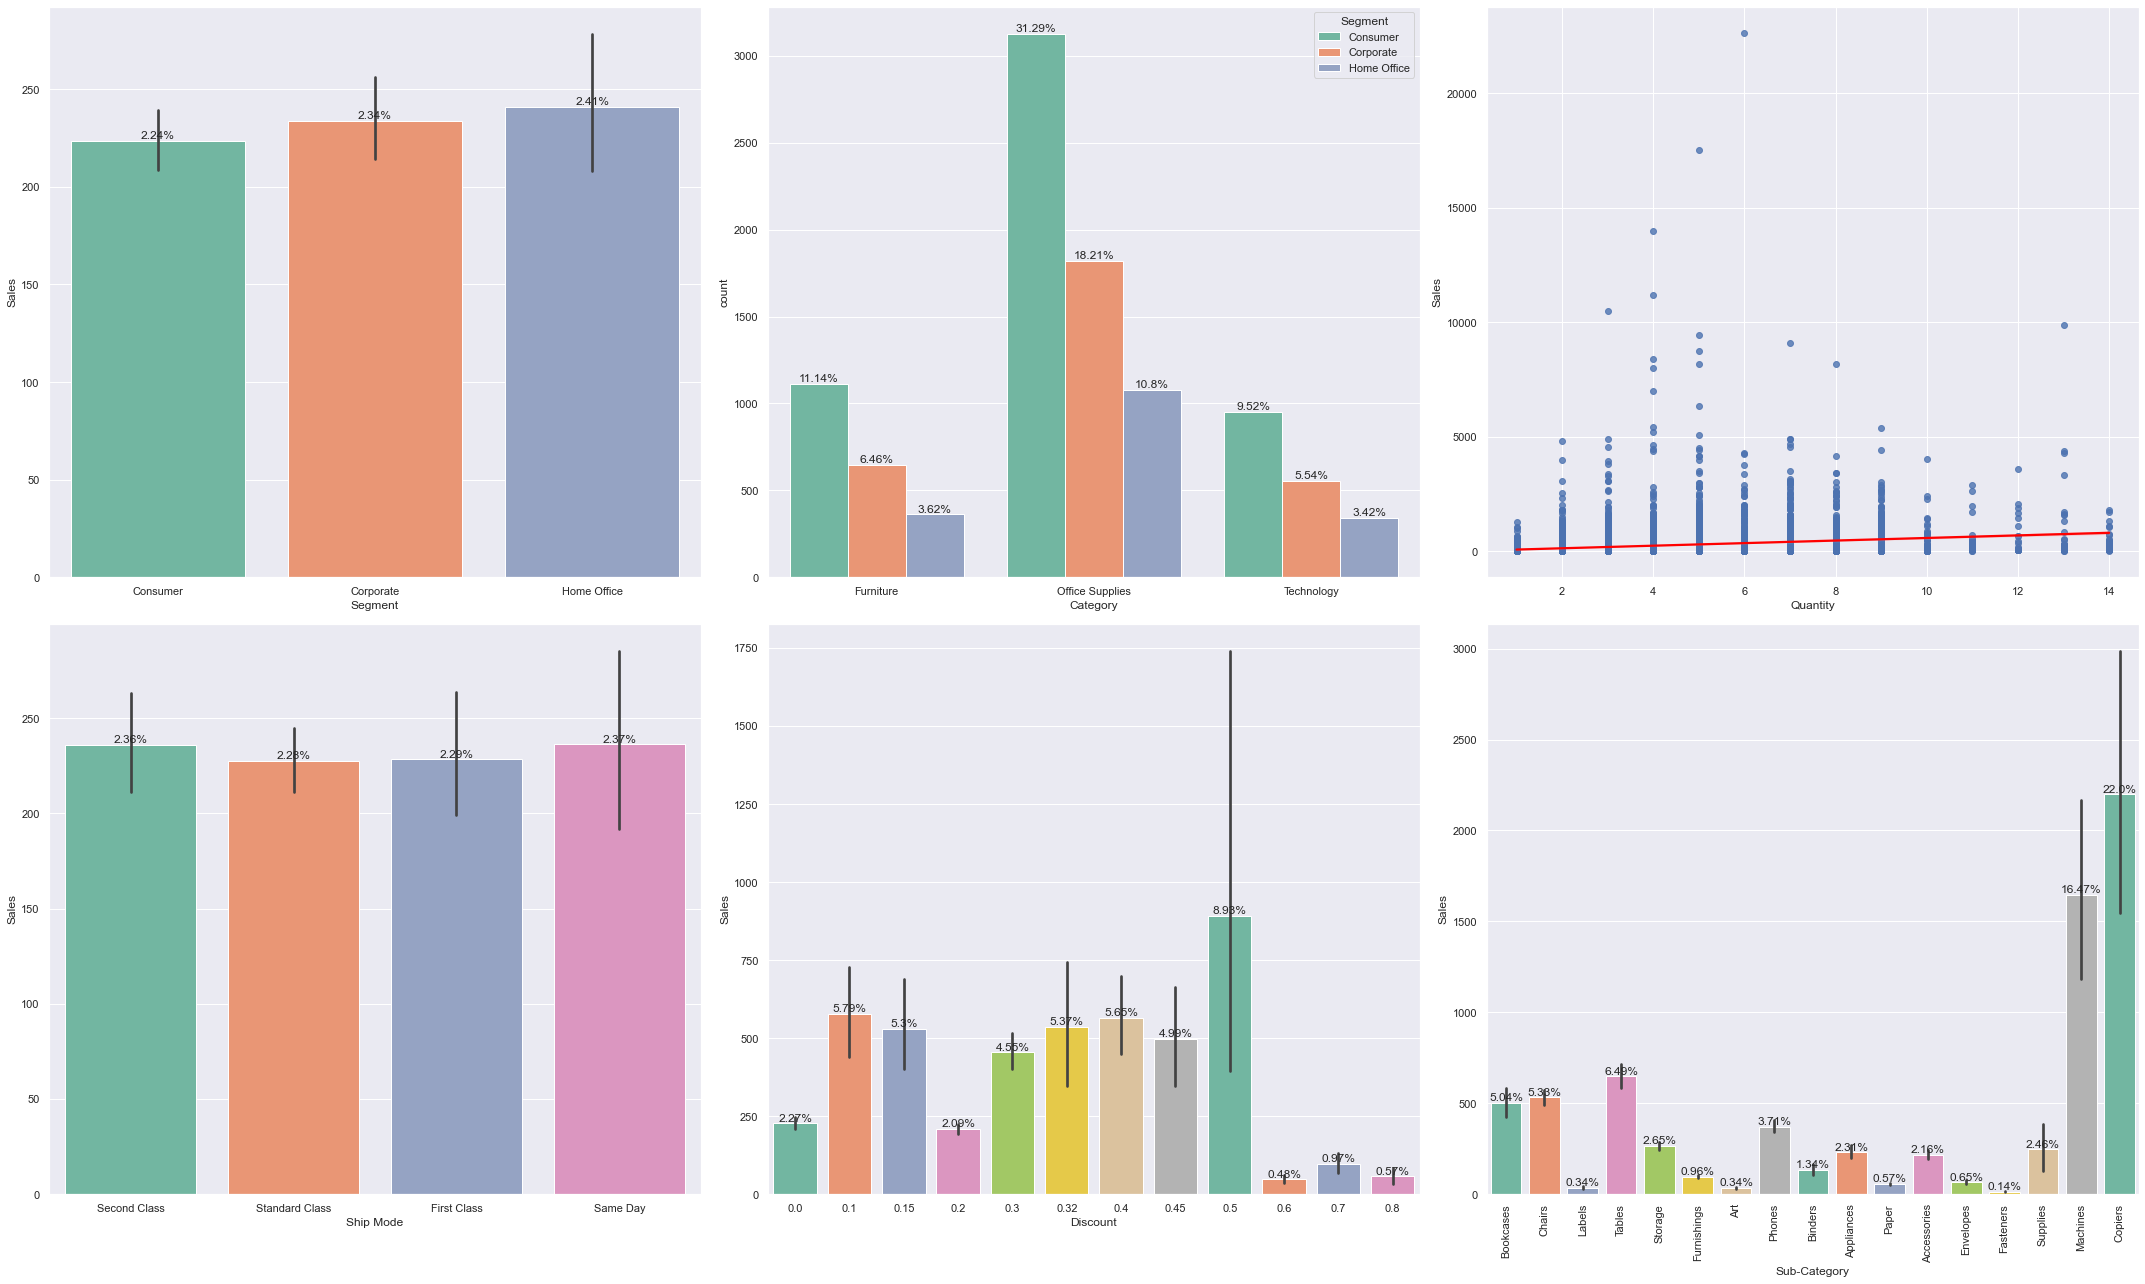

In [23]:
# Plotting the barplot for bivariate analysis

fig, ax = plt.subplots(2,3, tight_layout=True ,figsize=(30,18))
bar_percentage(sb.barplot(x=furniture_orders1['Segment'], y = furniture_orders1['Sales'],palette='Set2', ax=ax[0][0]), len(furniture_orders1))
bar_percentage(sb.countplot(x=furniture_orders1['Category'], hue=furniture_orders1['Segment'],palette='Set2', ax=ax[0][1]), len(furniture_orders1))
sb.regplot(x=furniture_orders1['Quantity'],y=furniture_orders1['Sales'],line_kws={'color':'red'},ax=ax[0][2])
bar_percentage(sb.barplot(furniture_orders1['Ship Mode'],y=furniture_orders1['Sales'], palette="Set2", ax=ax[1][0]), len(furniture_orders1))
bar_percentage(sb.barplot(furniture_orders1['Discount'],y=furniture_orders1['Sales'], palette="Set2", ax=ax[1][1]), len(furniture_orders1))
bar_percentage(sb.barplot(furniture_orders1['Sub-Category'],y=furniture_orders1['Sales'], palette="Set2", ax=ax[1][2]), len(furniture_orders1))
plt.xticks(rotation=90)

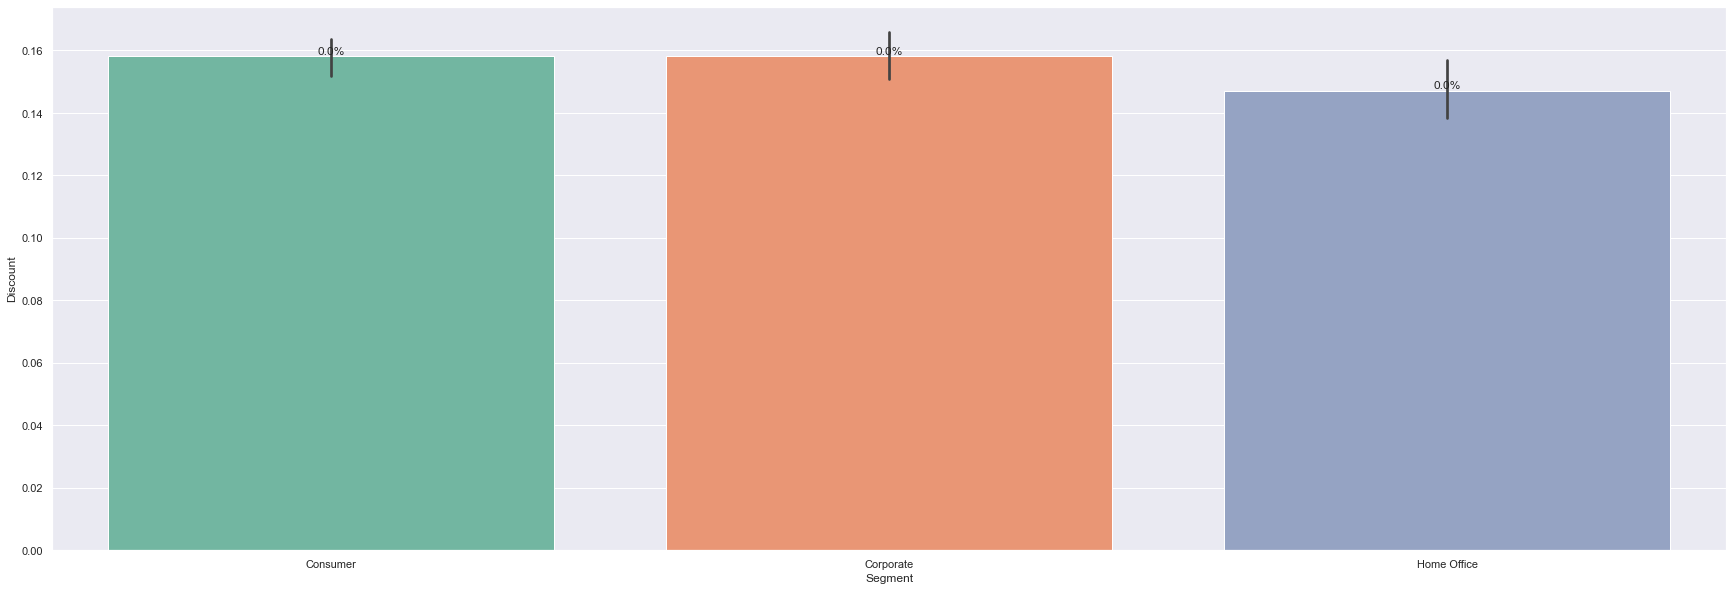

In [24]:
plt.figure(figsize=(30,10))
bar_percentage(sb.barplot(y=furniture_orders1['Discount'],x=furniture_orders1['Segment'], palette="Set2"), len(furniture_orders1))

**1. CUSTOMERS ARE MORE INSTERSTED TO BUY THINGS WHICH ARE GIVEN WITH 50% OF DISCOUNT.**

**2. WITH THE INCREASE IN DISCOUNT AND QUANTITY THE SALES HAVE BEEN INCREASED.**

**3. COPIERS AND MACHINES ARE FOUND TO MORE COSTLIER AND EVENTUALLY MAKE UP THE HIGH SALES AMOUNT WITH LOW NUMBER OF SALES TO THE CUSTOMERS.**

**4. HOME OFFICE SECTOR GIVES HIGH SALES RATE THAN CORPORATE AND CONSUMER SECTOR, EVENTUALLY CORPORATE COMES NEXT TO HOME OFFICE SINCE COSTLIER ITEMS ARE ORDERED BY THE CORPRATE SECTOR PEOPLE AND MORE NUMBER OF PRODUCTS ARE SOLD TO HOME OFFICE PEOPLE WHICH INCREASES THE SALES RATE IN BOTH OF THIS SECTORS. QUANTITY WISE CONSUMERS BEATS BOTH THE SECTOR SINCE MOSTLY CONSUMERS POPULATION IS HIGH IN BUYING THINGS IN ALL THE CATEGORIES.**

**5. AFTER TECHNOLOGY, FURNITURE FOUND TO EARN MORE SALES RATE AND PROFIT WHEN COMPARED WITH THE OFFICE SUPPLIES.**

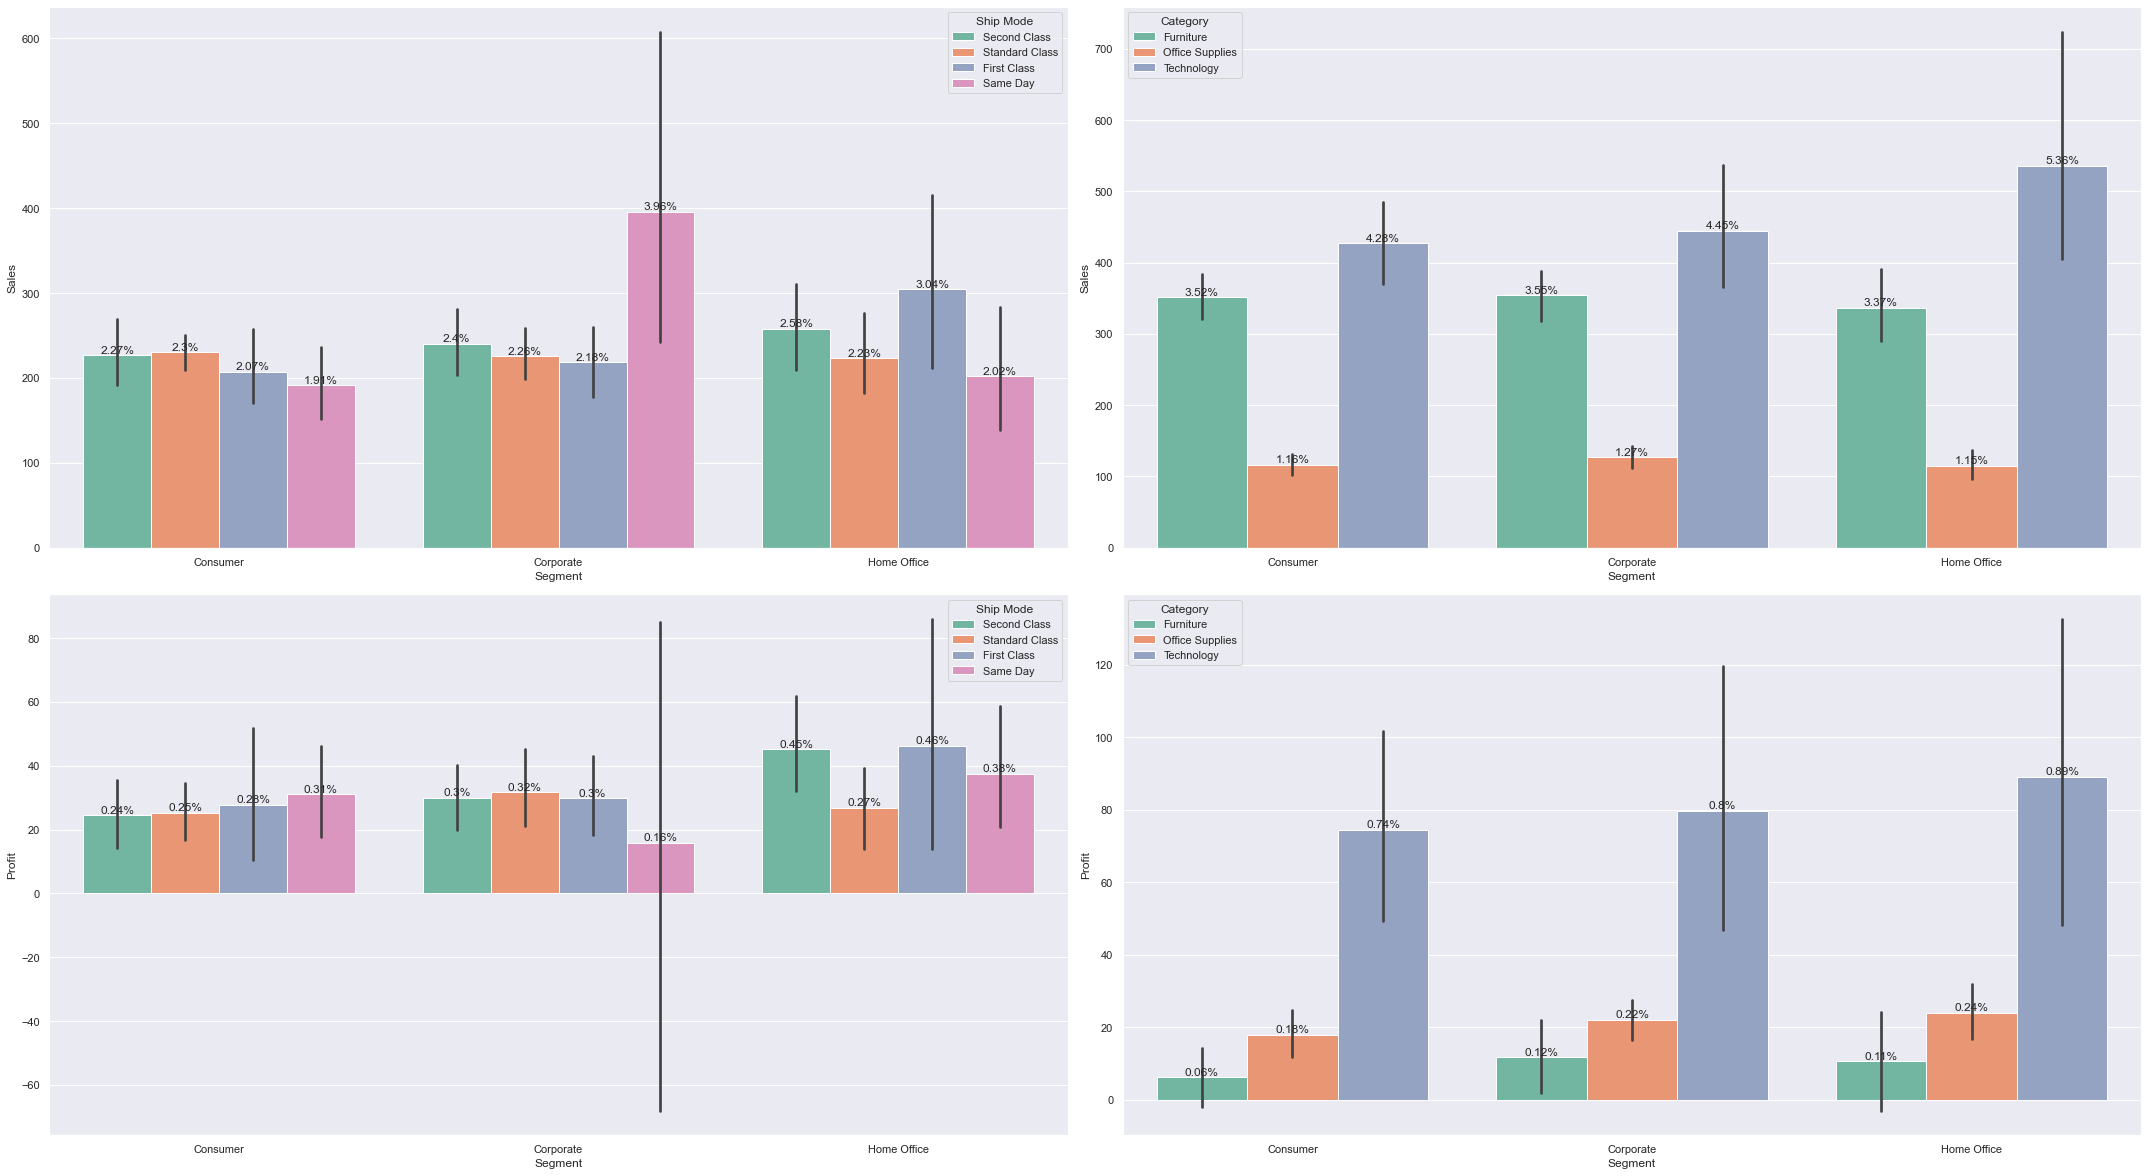

In [25]:
# Plotting the barplot for multivariate analysis

fig, ax = plt.subplots(2,2, tight_layout=True ,figsize=(30,16.5))
bar_percentage(sb.barplot(hue=furniture_orders1['Ship Mode'],x=furniture_orders1['Segment'], y = furniture_orders1['Sales'],palette='Set2', ax=ax[0][0]), len(furniture_orders1))
bar_percentage(sb.barplot(hue=furniture_orders1['Category'],x=furniture_orders1['Segment'], y=furniture_orders1['Sales'],palette='Set2', ax=ax[0][1]), len(furniture_orders1))
bar_percentage(sb.barplot(hue=furniture_orders1['Ship Mode'],x=furniture_orders1['Segment'],y=furniture_orders1['Profit'], palette="Set2", ax=ax[1][0]), len(furniture_orders1))
bar_percentage(sb.barplot(hue=furniture_orders1['Category'],x=furniture_orders1['Segment'],y=furniture_orders1['Profit'], palette="Set2", ax=ax[1][1]), len(furniture_orders1))

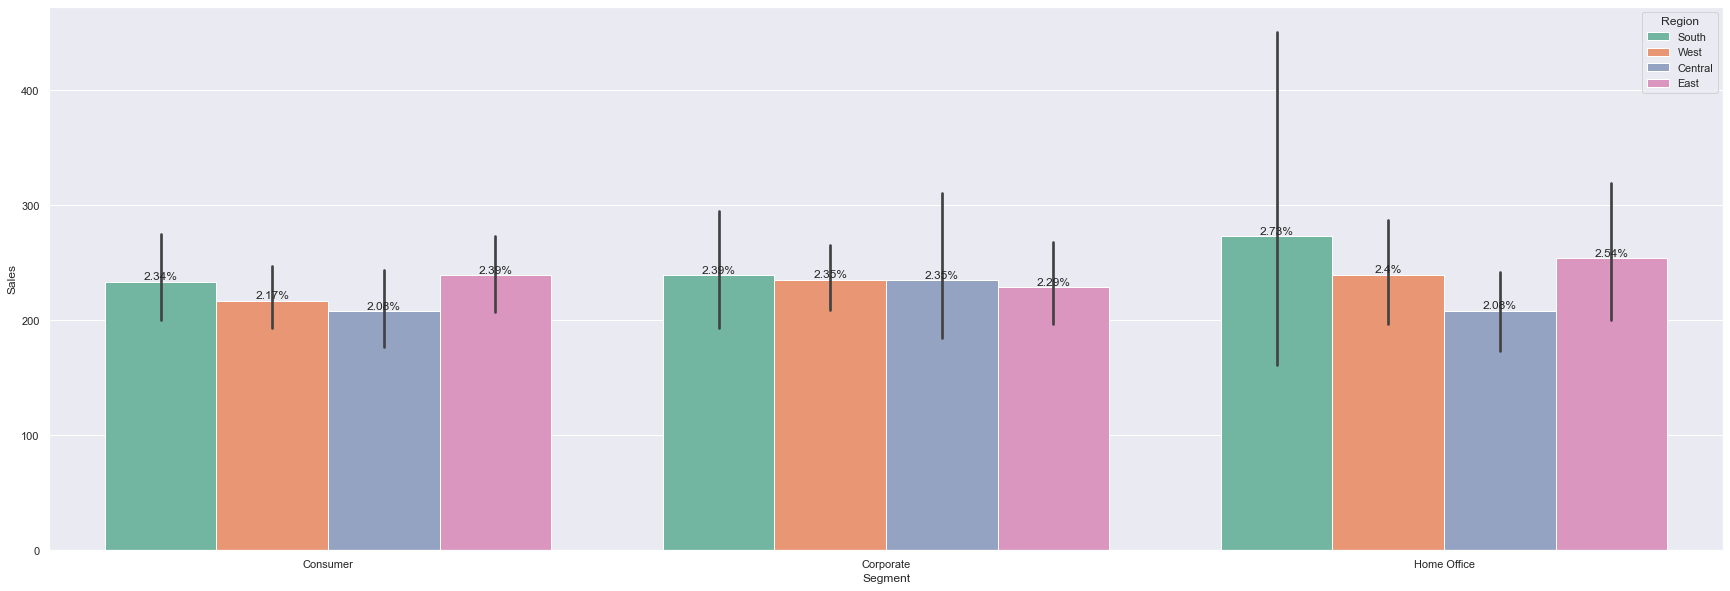

In [26]:
plt.figure(figsize=(30,10))
bar_percentage(sb.barplot(hue=furniture_orders1['Region'],x=furniture_orders1['Segment'],y=furniture_orders1['Sales'], palette="Set2"), len(furniture_orders1))

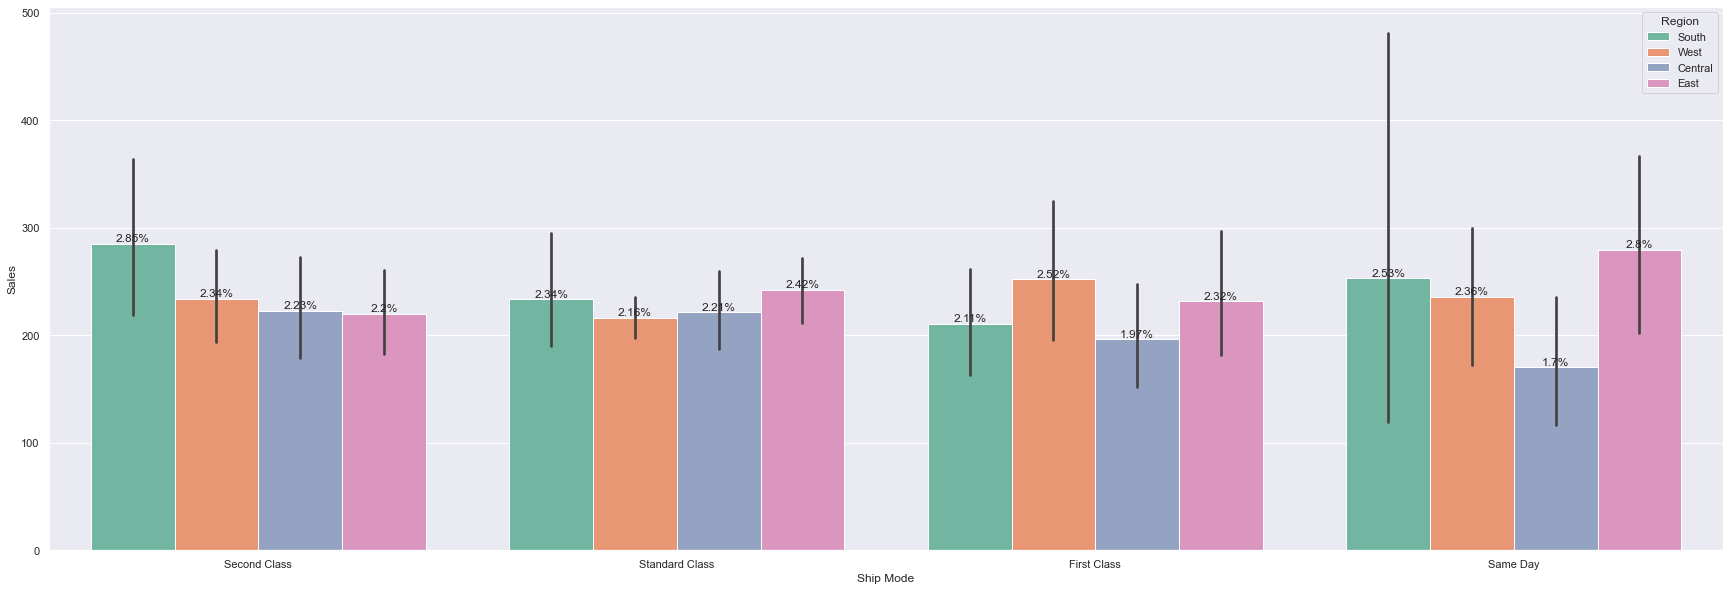

In [27]:
plt.figure(figsize=(30,10))
bar_percentage(sb.barplot(hue=furniture_orders1['Region'],x=furniture_orders1['Ship Mode'],y=furniture_orders1['Sales'], palette="Set2"), len(furniture_orders1))

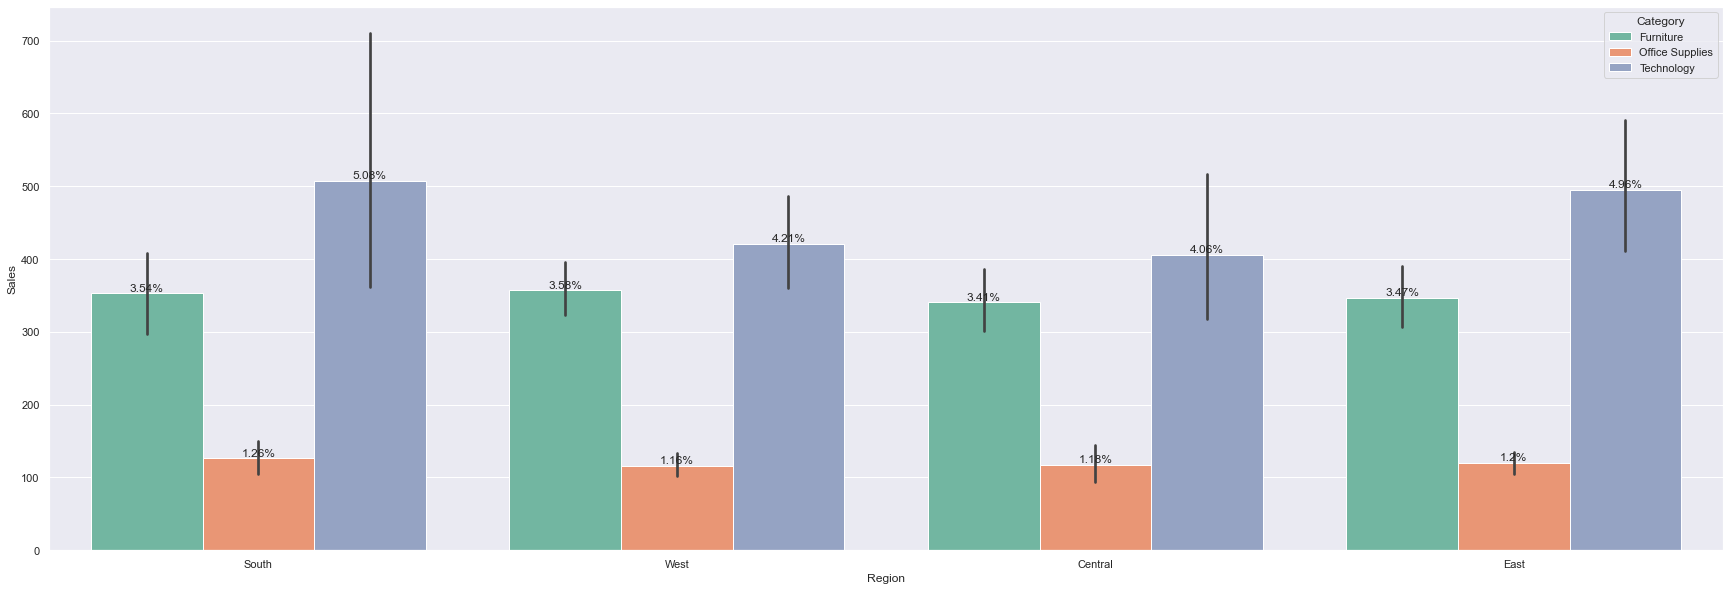

In [28]:
plt.figure(figsize=(30,10))
bar_percentage(sb.barplot(x=furniture_orders1['Region'],hue=furniture_orders1['Category'],y=furniture_orders1['Sales'], palette="Set2"), len(furniture_orders1))

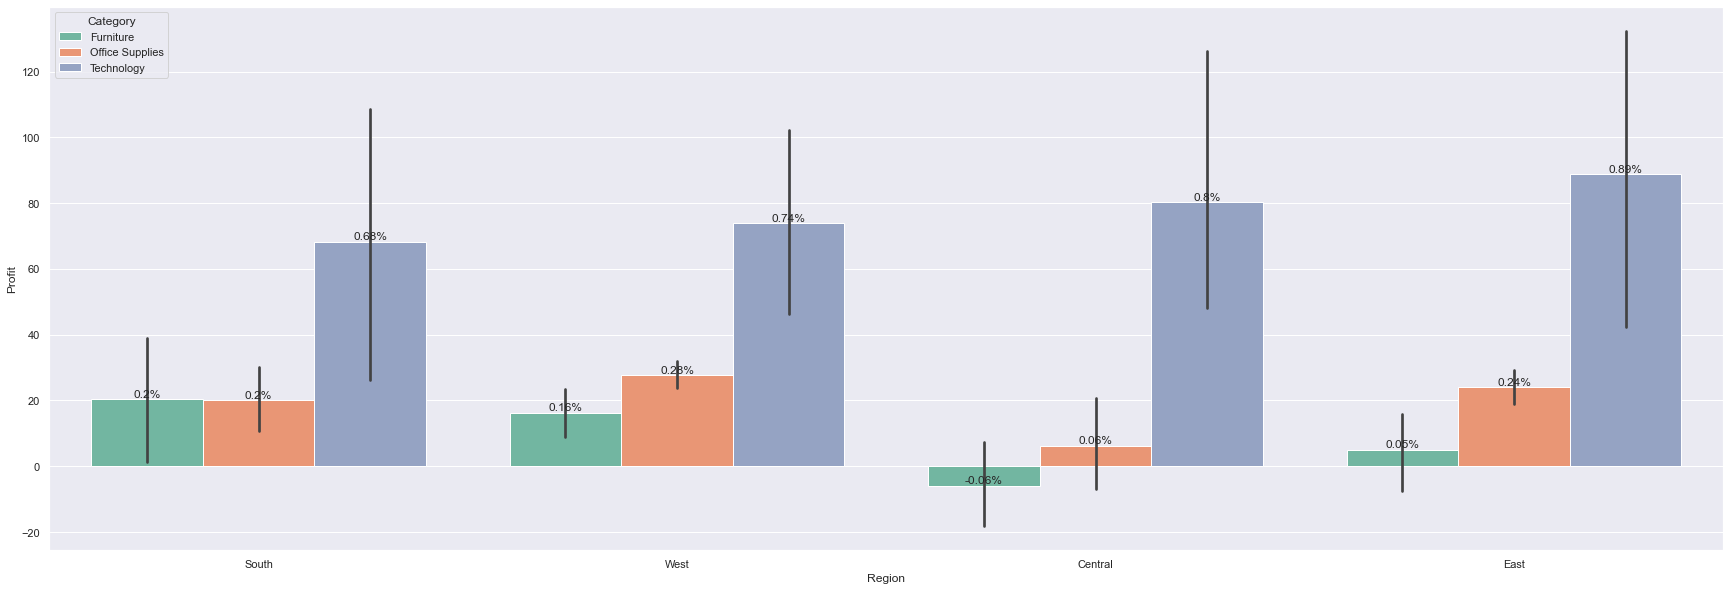

In [29]:
plt.figure(figsize=(30,10))
bar_percentage(sb.barplot(x=furniture_orders1['Region'],hue=furniture_orders1['Category'],y=furniture_orders1['Profit'], palette="Set2"), len(furniture_orders1))

# CONCLUSION

**1. FROM THE ANALYSIS IT IS CLEAR THAT EVERY SEGMENT SHOWS INTEREST IN BUYING TECHNOLOGY AND FURNITURE AT HIGHER RATE.**

**2. BECAUSE OF THE MAJORITY/POPULATION THE CONSUMERS TENDS TO BUY A LOT OF THINGS HIGH NUMBERS BUT THE CORPORATES AND HOME OFFICE PEOPLE FOUND TO BUY LOT OF COSTLIER ITEMS LIKE TECHNOLOGY AND FURNITURE SECTOR THINGS. SO CORPORATE AND HOME OFFICE PEOPLE CAN BE TARGETTED WITH MORE VARIETY OF PRODUCTS IN FURNITURE AND TECHNOLOGY SECTORS AND DISCOUNTS ARE HIGHLY GIVEN TO CONSUMERS BUT THE SALES IS LESS SINCE MOSTLY COST EFFECTIVE ITEMS ARE BROUGHT BY THE CONSUMER SEGMENT PEOPLE. SO DISCOUNTS CAN BE GIVEN TO HOME OFFICE AND CORPORATE SECTORS FOR THE ITEMS WHICH IS COSTLIER TO ATTRACT THEM.**

**3. WEST REGION PEOPLE ARE FOUND TO BE THE MAJORITY TO BUY ITEMS FROM HERE. SINCE THE PROFIT IS HIGH FROM THE SOUTHERN AND EASTERN REGIONS, CONCENTRATION CAN BE GIVEN TO THAT REGIONS THE SALES RATE IS ALSO IN SOUTHERN REGIONS AND EAST COMES NEXT TO IT. SO POSSIBLY SOUTHERN AND EASTERN REGION FOUND TO HAVE CORPORATE AND HOME OFFICE SECTOR PEOPLE IN HIGHER AMOUNT, ADDITIONALLY THE FIRST CLASS AND SAME DAY SHIP MODES ARE HIGHLY FOUND TO BE CHOSEN FROM THE EASTERN REGIONS.**

**4. OFFICE SUPPLIES ARE NOT SO POPULAR AMONG THE CORPORATE OR HOME OFFICE SECTOR PEOPLE. CONSUMER SECTORS REQUIRES THE OFFICE SUPPLIES WHICH GAVE A HIGH SALES RATE.**

**5. CENTRAL REGION FOUND TO GIVE LOSS FOR FURNITURES AND LESS PROFIT FOR OFFICE SUPPLIES SO FURNITURES SALES AND OFFICE SUPPLIES SALES CAN BE TERMINATED AND TECHNOLOGY SALES CAN BE IMPROVED SINCE IT IS IN HIGH DEMAND IN THE CENTRAL AND EAST REGION. AND EAST REGION FOUND TO GIVE LESS PROFIT SO THERE ALSO FURNITURE SALES CAN BE REDUCED AND IN WEST AND IN SOUTH REGION IT IS FOUND TO HAVE HIGHER PROFIT RATE COMPARED WITH OTHER REGIONS SO FURNITURE SALES CAN BE INCREASED THERE SINCE IT SHOWS SOME DEMAND FOR FURNITURES IN THAT REGION.**

# ARMA

In [30]:
l2, l1, l3=[], [], []
a = 1

for p in range(0,6):
    for q in range(0,5):
        try:
            model = ARIMA(train, order=(p,0,q)).fit()
            aic, bic = np.round(model.aic,1), np.round(model.bic,1)
            print(p,q)
            p_value = sm.stats.acorr_ljungbox(model.resid, lags=[1], return_df=True)['lb_pvalue'].values
            if p_value < 0.05:
                print('not a good model')
                l3.append('Not a good model')
            else: 
                print('Good model')
                l3.append('Good model')
            test_model = model.predict(start=0, end=len(test)-1)
            actual=[]; pred=[]
            for i in range(len(test)):
                actual.append(test[i])
                pred.append(test_model[i])
            m_df = pd.DataFrame({'Actual': actual, 'Forecast':pred})
            m_df['error'] = m_df.Actual- m_df.Forecast
            print(m_df)
            mse = mean_squared_error(m_df.Actual, m_df.Forecast)
            rmse = np.sqrt(mse)
            l2.append(model)
            l1.append(['Model_'+str(a),p, q, aic, mse, rmse, p_value])
            a+=1
        except:
            print('Some Error with the Model')

0 0
not a good model
        Actual     Forecast         error
0     951.6460  3264.919284  -2313.273284
1    4827.3080  3264.919284   1562.388716
2    3846.4728  3264.919284    581.553516
3    1775.1585  3264.919284  -1489.760784
4    1300.0530  3264.919284  -1964.866284
5    2660.3620  3264.919284   -604.557284
6    2064.5086  3264.919284  -1200.410684
7    7563.8318  3264.919284   4298.912516
8    2854.3050  3264.919284   -410.614284
9    4315.4260  3264.919284   1050.506716
10   1684.1030  3264.919284  -1580.816284
11   3189.5964  3264.919284    -75.322884
12   2604.8940  3264.919284   -660.025284
13   5614.8635  3264.919284   2349.944216
14   3534.2230  3264.919284    269.303716
15   4604.9022  3264.919284   1339.982916
16   2807.8420  3264.919284   -457.077284
17   2963.5510  3264.919284   -301.368284
18   4442.2370  3264.919284   1177.317716
19   1562.4320  3264.919284  -1702.487284
20    505.4320  3264.919284  -2759.487284
21   2670.6860  3264.919284   -594.233284
22   5592.790

In [31]:
best_df = pd.DataFrame(l1, columns=['Model', 'P', 'Q', 'AIC', 'MSE', 'RMSE', 'P Value'])
best_df = pd.concat([best_df, pd.DataFrame(l3,columns=["Model Status"])], axis=1)
best_df.sort_values(by='RMSE',ascending=True)

,Model,P,Q,AIC,MSE,RMSE,P Value,Model Status
27,Model_28,5,2,3083.0,9.158812e+06,3026.352877,[0.9535756997327869],Good model
3,Model_4,0,3,3080.4,1.017634e+07,3190.037728,[0.7423930110331276],Good model
13,Model_14,2,3,3082.5,1.028679e+07,3207.302475,[0.9355407277454406],Good model
2,Model_3,0,2,3082.0,1.034117e+07,3215.769275,[0.7420070220789986],Good model
8,Model_9,1,3,3080.5,1.036374e+07,3219.275718,[0.97634713675762],Good model
10,Model_11,2,0,3076.9,1.036529e+07,3219.517139,[0.9180311800110722],Good model
0,Model_1,0,0,3098.4,1.038716e+07,3222.911171,[2.442771069521504e-05],Not a good model
7,Model_8,1,2,3078.5,1.042450e+07,3228.700005,[0.9730636204966034],Good model
15,Model_16,3,0,3078.5,1.042475e+07,3228.737512,[0.9951980311531783],Good model
18,Model_19,3,3,3084.3,1.045479e+07,3233.386110,[0.9638891137877393],Good model


In [32]:
# Building ARMA model
p = 5; d= 0; q=2
arma = ARIMA(train,order = (p,d,q)).fit()
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(arma.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")
# Arma prediction
f1 = arma.forecast(len(test)+52)
f1

Fail-to-Reject H0. Good model


2017-03-19    1674.550587
2017-03-26    2119.573759
2017-04-02    2006.456248
2017-04-09    2459.190896
2017-04-16    2266.380189
                 ...     
2018-12-02    3261.833982
2018-12-09    3251.748922
2018-12-16    3262.256780
2018-12-23    3252.919016
2018-12-30    3262.629233
Freq: W-SUN, Name: predicted_mean, Length: 94, dtype: float64

In [33]:
arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  166
Model:                 ARIMA(5, 0, 2)   Log Likelihood               -1532.506
Date:                Mon, 08 Aug 2022   AIC                           3083.013
Time:                        10:49:35   BIC                           3111.021
Sample:                    01-12-2014   HQIC                          3094.381
                         - 03-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3264.9267    318.935     10.237      0.000    2639.826    3890.028
ar.L1          0.2501      0.109      2.305      0.021       0.037       0.463
ar.L2          1.1610      0.090     12.970      0.000       0.986       1.336
ar.L3         -0.1808      0.135     -1.341      0.180      -0.445       0.084
ar.L4         -0.2226      0.081     -2.733      0.006      -0.382      -0.063
ar.L5         -0.0509      0.102     -0.498      0.618      -0.251       0.149
ma.L1          0.0016      0.796      0.002      0.998      -1.559       1.562
ma.L2         -0.9984      0.128     -7.801      0.000      -1.249      -0.748
sigma2      6.348e+06   1.29e-05   4.91e+11      0.000    6.35e+06    6.35e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               109.24
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                             1.46
Prob(H) (two-sided):                  0.66   Kurtosis:                         5.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.7e+30. Standard errors may be unstable.
"""

In [34]:
l4, l5, l6 = [], [], []
model1 = ARIMA(train, order=(5,0,2)).fit()
aic1, bic1 = np.round(model1.aic,2), np.round(model1.bic,2)
print('p=5, q=2, d=0')
l4.append(model1)
p_value1 = sm.stats.acorr_ljungbox(model1.resid, lags=[1], return_df=True)['lb_pvalue'].values
if p_value1 < 0.05:
    print('not a good model')
    l5.append('Not a good model')
else: 
    print('Good model')
    l5.append('Good model')
test_model1 = model1.predict(start=len(train), end=len(train)+len(test)-1)
actual1=[]; pred1=[]
for i in range(len(test)):
    actual1.append(test[i])
    pred1.append(test_model1[i])
m_df1 = pd.DataFrame({'Actual': actual1, 'Forecast':pred1})
m_df1['error'] = m_df1.Actual - m_df1.Forecast
mse1 = mean_squared_error(m_df1.Actual, m_df1.Forecast)
rmse1 = np.sqrt(mse1)
l6.append(['Model_'+str(a),5, 2, aic1, mse1, rmse1, p_value1])

p=5, q=2, d=0
Good model


In [35]:
best = pd.DataFrame(l6, columns=['Model', 'P', 'Q', 'AIC', 'MSE', 'RMSE', 'P Value'])
best = pd.concat([best, pd.DataFrame(l5,columns=["Model Status"])], axis=1)
best

,Model,P,Q,AIC,MSE,RMSE,P Value,Model Status
0,Model_31,5,2,3083.01,1.092527e+07,3305.340102,[0.9535756997327869],Good model


Text(0.5, 1.0, 'ARMA MODEL FORECAST (5,0,2)')

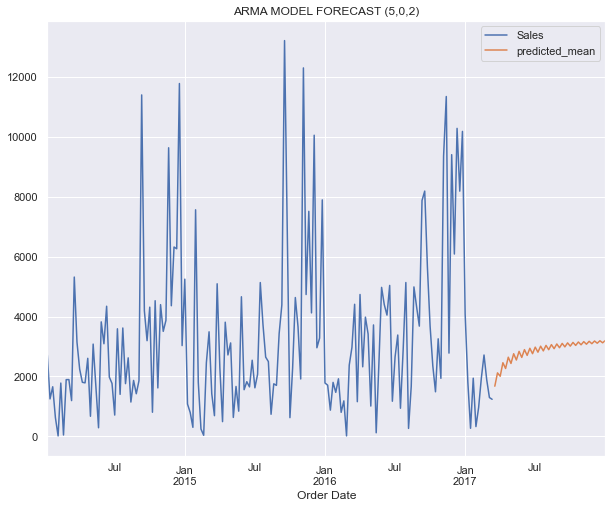

In [36]:
train.plot(figsize=(10,8),legend=True)
test_model1.plot(legend=True)
plt.title('ARMA MODEL FORECAST (5,0,2)')

# SARIMA

In [37]:
li2, li1, li3=[], [], []
a = 1

for p in range(0,6):
    for q in range(0,5):
        try:
            model = sm.tsa.statespace.SARIMAX(train,order=(p,0,q),seasonal_order=(p,0,q,52)).fit()
            aic, bic = np.round(model.aic,1), np.round(model.bic,1)
            print(p,q)
            p_value = sm.stats.acorr_ljungbox(model.resid, lags=[1], return_df=True)['lb_pvalue'].values
            if p_value < 0.05:
                print('not a good model')
                li3.append('Not a good model')
            else: 
                print('Good model')
                li3.append('Good model')
            test_model = model.predict(start=len(train), end=len(train)+len(test)-1, dynamic = True)
            actual=[]; pred=[]
            for i in range(len(test)):
                actual.append(test[i])
                pred.append(test_model[i])
            m_df = pd.DataFrame({'Actual': actual, 'Forecast':pred})
            m_df['error'] = m_df.Actual- m_df.Forecast
            print(m_df)
            mse = mean_squared_error(m_df.Actual, m_df.Forecast)
            rmse = np.sqrt(mse)
            li2.append(model)
            li1.append(['Model_'+str(a),p, q, aic, mse, rmse, p_value])
            a+=1
        except:
            print('Some Error with the Model')

0 0
not a good model
        Actual  Forecast       error
0     951.6460       0.0    951.6460
1    4827.3080       0.0   4827.3080
2    3846.4728       0.0   3846.4728
3    1775.1585       0.0   1775.1585
4    1300.0530       0.0   1300.0530
5    2660.3620       0.0   2660.3620
6    2064.5086       0.0   2064.5086
7    7563.8318       0.0   7563.8318
8    2854.3050       0.0   2854.3050
9    4315.4260       0.0   4315.4260
10   1684.1030       0.0   1684.1030
11   3189.5964       0.0   3189.5964
12   2604.8940       0.0   2604.8940
13   5614.8635       0.0   5614.8635
14   3534.2230       0.0   3534.2230
15   4604.9022       0.0   4604.9022
16   2807.8420       0.0   2807.8420
17   2963.5510       0.0   2963.5510
18   4442.2370       0.0   4442.2370
19   1562.4320       0.0   1562.4320
20    505.4320       0.0    505.4320
21   2670.6860       0.0   2670.6860
22   5592.7900       0.0   5592.7900
23   4854.5880       0.0   4854.5880
24   5900.2410       0.0   5900.2410
25   6038.8250   

In [38]:
best_s_df = pd.DataFrame(li1, columns=['Model', 'P', 'Q', 'AIC', 'MSE', 'RMSE', 'P Value'])
best_s_df = pd.concat([best_s_df, pd.DataFrame(li3,columns=["Model Status"])], axis=1)
best_s_df.sort_values(by='RMSE',ascending=True)

,Model,P,Q,AIC,MSE,RMSE,P Value,Model Status
27,Model_28,5,2,3095.8,6.209299e+06,2491.846570,[0.7385434959923447],Good model
28,Model_29,5,3,3096.0,6.247936e+06,2499.587123,[0.7796478430941604],Good model
29,Model_30,5,4,3099.4,6.305179e+06,2511.011608,[0.7951856946840185],Good model
9,Model_10,1,4,3092.0,6.320947e+06,2514.149265,[0.9310064868905482],Good model
16,Model_17,3,1,3086.9,6.345999e+06,2519.126690,[0.6239713769023807],Good model
13,Model_14,2,3,3089.4,6.360722e+06,2522.047210,[0.8223662643378878],Good model
26,Model_27,5,1,3091.2,6.579557e+06,2565.064703,[0.8574919477424081],Good model
18,Model_19,3,3,3093.8,6.599466e+06,2568.942572,[0.7635508274630184],Good model
17,Model_18,3,2,3090.6,7.107150e+06,2665.923858,[0.9082581664578195],Good model
7,Model_8,1,2,3081.1,7.207010e+06,2684.587532,[0.8817545110030349],Good model


In [39]:
li4, li5, li6 = [], [], []
model2 = sm.tsa.statespace.SARIMAX(train,order=(5,0,2),seasonal_order=(5,0,2,52)).fit()
aic2, bic2 = np.round(model2.aic,2), np.round(model2.bic,2)
print('p=2, q=2, d=0')
li4.append(model2)
p_value2 = sm.stats.acorr_ljungbox(model2.resid, lags=[1], return_df=True)['lb_pvalue'].values
if p_value2 < 0.05:
    print('not a good model')
    li5.append('Not a good model')
else: 
    print('Good model')
    li5.append('Good model')
test_model2 = model2.predict(start=len(train), end=len(train)+len(test)-1, dynamic = True)
actual2=[]; pred2=[]
for i in range(len(test)):
    actual2.append(test[i])
    pred2.append(test_model2[i])
m_df2 = pd.DataFrame({'Actual': actual2, 'Forecast':pred2})
m_df2['error'] = m_df2.Actual - m_df2.Forecast
mse2 = mean_squared_error(m_df2.Actual, m_df2.Forecast)
rmse2 = np.sqrt(mse2)
li6.append(['Model_'+str(a),5, 2, aic2, mse2, rmse2, p_value2])

p=2, q=2, d=0
Good model


In [40]:
best2 = pd.DataFrame(li6, columns=['Model', 'P', 'Q', 'AIC', 'MSE', 'RMSE', 'P Value'])
best2 = pd.concat([best2, pd.DataFrame(li5,columns=["Model Status"])], axis=1)
best2

,Model,P,Q,AIC,MSE,RMSE,P Value,Model Status
0,Model_31,5,2,3095.8,6.209299e+06,2491.84657,[0.7385434959923447],Good model


In [89]:
m_df2

,Actual,Forecast,error
0,951.6460,2703.433315,-1751.787315
1,4827.3080,2999.915006,1827.392994
2,3846.4728,3016.062250,830.410550
3,1775.1585,2740.263387,-965.104887
4,1300.0530,3248.718205,-1948.665205
5,2660.3620,3486.404625,-826.042625
6,2064.5086,2509.961703,-445.453103
7,7563.8318,3289.277355,4274.554445
8,2854.3050,2235.116647,619.188353
9,4315.4260,2788.165718,1527.260282


Text(0.5, 1.0, 'SARIMA MODEL FORECAST (5,0,2)')

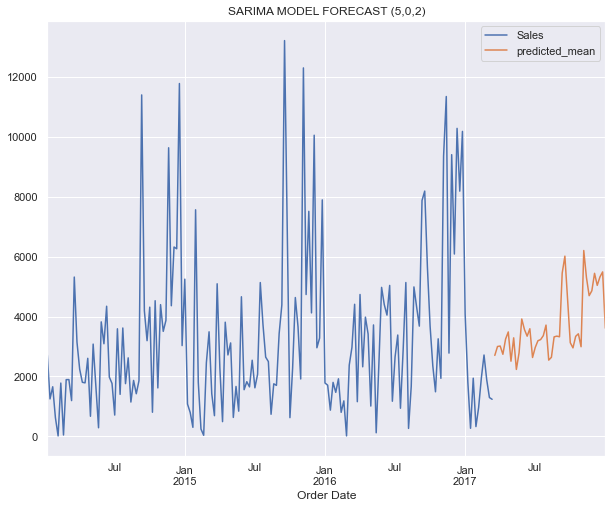

In [41]:
train.plot(figsize=(10,8),legend=True)
test_model2.plot(legend=True)
plt.title('SARIMA MODEL FORECAST (5,0,2)')

# SARIMAX

In [42]:
train1 = resampled_furniture_orders[:int(0.7*len(resampled_furniture_orders))]
test1 = resampled_furniture_orders[int(0.7*len(resampled_furniture_orders)):]
print(f"Train DF Shape = {train1.shape} | Test DF Shape = {test1.shape}")

Train DF Shape = (145, 6) | Test DF Shape = (63, 6)


In [43]:
exog_train = train1[['Quantity', 'Discount', 'Postal Code']]
exog_test  = test1[['Quantity', 'Discount', 'Postal Code']]

In [44]:
liS4, liS5, liS6 = [], [], []
model3 = sm.tsa.statespace.SARIMAX(train1.Sales,order=(5,0,2),seasonal_order=(5,0,2,52), exog=exog_train.values).fit()
aic3, bic3 = np.round(model3.aic,2), np.round(model3.bic,2)
liS4.append(model3)
p_value3 = sm.stats.acorr_ljungbox(model3.resid, lags=[1], return_df=True)['lb_pvalue'].values
if p_value3 < 0.05:
    print('not a good model')
    liS5.append('Not a good model')
else: 
    print('Good model')
    liS5.append('Good model')
test_model3 = model3.predict(start=len(test1), exog=exog_test.values)
actual3=[]; pred3=[]
for i in range(len(test)):
    actual3.append(test[i])
    pred3.append(test_model3[i])
m_df3 = pd.DataFrame({'Actual': actual3, 'Forecast':pred3})
m_df3['error'] = m_df3.Actual - m_df3.Forecast
mse3 = mean_squared_error(m_df3.Actual, m_df3.Forecast)
rmse3 = np.sqrt(mse3)
liS6.append(['Model_'+str(a),5, 2, aic3, mse3, rmse3, p_value3])

p=2, q=2, d=0
Good model


In [45]:
best3 = pd.DataFrame(liS6, columns=['Model', 'P', 'Q', 'AIC', 'MSE', 'RMSE', 'P Value'])
best3 = pd.concat([best3, pd.DataFrame(liS5,columns=["Model Status"])], axis=1)
best3

,Model,P,Q,AIC,MSE,RMSE,P Value,Model Status
0,Model_31,5,2,2549.27,9.499726e+06,3082.162572,[0.259012349945253],Good model


Text(0.5, 1.0, 'SARIMAX model. Forecast Comparison of Energy Appliances')

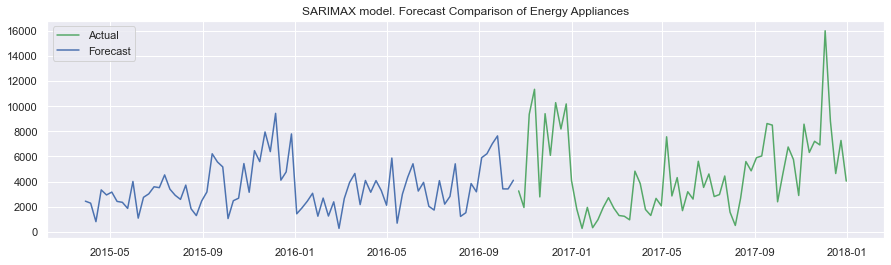

In [46]:
# plot the actual and forecast data (SARIMAX)
plt.figure(figsize=(15,4))
plt.plot(test1.Sales,'g',label='Actual')
plt.plot(test_model3,'b',label='Forecast')
plt.legend()
plt.title("SARIMAX model. Forecast Comparison of Energy Appliances")

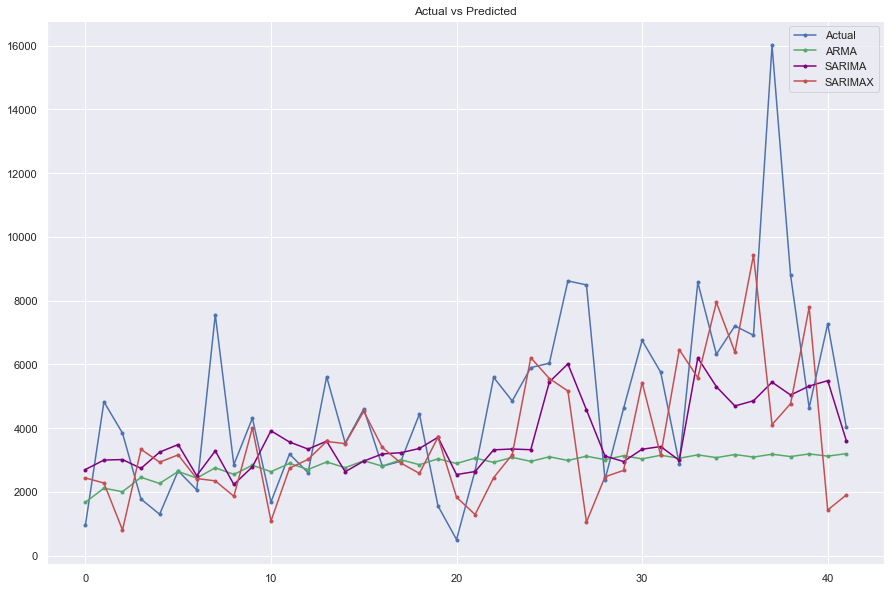

In [48]:
fig,ax = plt.subplots(figsize = (15,10))

plt.subplot(111)
plt.plot(m_df2.Actual,color = 'b',marker = '.',label = 'Actual')
plt.plot(m_df1.Forecast,color = 'g',marker = '.',label = 'ARMA')
plt.plot(m_df2.Forecast,color = 'Purple',marker = '.',label = 'SARIMA')
plt.plot(m_df3.Forecast,color = 'r',marker = '.',label = 'SARIMAX')
plt.legend()
plt.title('Actual vs Predicted')


plt.show()

In [56]:
com = pd.DataFrame([best.RMSE.values, best2.RMSE.values, best3.RMSE.values], index=['ARMA', 'SARIMA', 'SARIMAX'],columns=['RMSE'])
com.sort_values('RMSE', ascending=True)

,RMSE
SARIMA,2491.846570
SARIMAX,3082.162572
ARMA,3305.340102


In [57]:
model1.forecast(len(test)+52)

2017-03-19    1674.550587
2017-03-26    2119.573759
2017-04-02    2006.456248
2017-04-09    2459.190896
2017-04-16    2266.380189
                 ...     
2018-12-02    3261.833982
2018-12-09    3251.748922
2018-12-16    3262.256780
2018-12-23    3252.919016
2018-12-30    3262.629233
Freq: W-SUN, Name: predicted_mean, Length: 94, dtype: float64

In [58]:
model2.forecast(len(test)+52)

2017-03-19    2703.433315
2017-03-26    2999.915006
2017-04-02    3016.062250
2017-04-09    2740.263387
2017-04-16    3248.718205
                 ...     
2018-12-02    4941.354971
2018-12-09    4817.484023
2018-12-16    4614.346038
2018-12-23    5353.150092
2018-12-30    3449.560132
Freq: W-SUN, Name: predicted_mean, Length: 94, dtype: float64

In [88]:
model3.forecast(len(resampled_furniture_orders[['Quantity', 'Discount', 'Postal Code']]), exog=resampled_furniture_orders[['Quantity', 'Discount', 'Postal Code']])

2016-10-23     1432.992550
2016-10-30     2387.602494
2016-11-06     2344.036605
2016-11-13      497.958428
2016-11-20      176.334325
                  ...     
2020-09-13    14520.320791
2020-09-20    10795.122303
2020-09-27     5844.060427
2020-10-04     7208.161568
2020-10-11     5942.600679
Freq: W-SUN, Name: predicted_mean, Length: 208, dtype: float64

# CONCLUSION:

1. BASED ON THE RMSE THE SARIMA MODEL IN OVERALL GIVES FORECAST WITH LESS ERROR.

2. SARIMAX CAN BE CHOSEN NEXT TO IT SINCE THE ERROR RATE IS ALSO LESS FOR THE FORECAST.